In [7]:
#Importing necessary packages
using LinearAlgebra
using Plots
using Distributions
using Random
using LaTeXStrings
using Statistics
using StatsPlots

In [2]:
#Function to generate the initial state with +1 spins (with probability p)
function init_st(n, p)
    L=zeros(n,n); #creating a matrix which will be our lattice

    #assigning spins to lattice site according to probability p 
    for i =1:n
        for j = 1:n
            a=rand()
            if a<p
                L[i,j]=1
            else
                L[i,j]=-1
            end
        end
    end

    #imposing periodic boundary condition to ensure that boundary terms also get 4 neighbours
    L
end


init_st (generic function with 1 method)

In [3]:
#=Function to impose periodic boundary conditions:
if index site is less than 1, it returns n (the index of the opposite site of the lattice) and vice versa. 
this way, the whole lattice is wrapped around itself, satisfying PBC
=#
function boundary(i)
    if i<1
        return n
    elseif i>n
        return 1
    else
        return i
    end
end

boundary (generic function with 1 method)

In [8]:
#dimension
n=50

#Metropolis
#defining range of beta for which to run
para=0.01:0.01:1.5

#running for 100 trials
for i = 1:100
    #stores value of magnetisation for each trial
    m_m1=[]

    #stores the heat capacity for each trial
    C2=[]
    #creating initial state with random spins 
    L= init_st(n, 0.5);


    #running the metropolis algorithm for entire range of beta
    for k = 1:length(para)

        #stores energy
        e=0
        ev=0
        #running each MC step
        for i =1:160000
            b=para[k]
            #choosing a random lattice point
            i=rand(1:n)
            j=rand(1:n)
            S= -2*L[i,j]*(L[boundary(i+1),j]+L[boundary(i-1),j]+L[i,boundary(j+1)]+L[i,boundary(j-1)]) #calculating energy difference between the present state and if spin is flipped
            E_diff=-S

            e+=E_diff
            ev+=E_diff^2

            #using the spin flip rules
            if E_diff<=0
                    L[i,j]*=-1
            else
                A=exp(-b*E_diff)
                cnt=rand()
                if cnt<A
                    L[i,j]*=-1
                end
            end
        end
        append!(C2, ((1/160000.0)*ev -(1/160000.0)*(1/160000.0)*e*e)*(para[k]^2)/(n*n))
        append!(m_m1,sum(L)/(n*n))
        push!(s_m, copy(L))
    end
end
        

UndefVarError: UndefVarError: `s_m` not defined

In [11]:
#dimension
n=50

#Metropolis
#defining range of beta for which to run
para=1

#running for 100 trials
L= init_st(n, 0.5);
X=zeros(n,n)
MCS=n*n
#running the metropolis algorithm for entire range of beta

    #running each MC step
for m =1:16000
    b=para
    #choosing a random lattice point
    i=rand(1:n)
    j=rand(1:n)
    S= -2*L[i,j]*(L[boundary(i+1),j]+L[boundary(i-1),j]+L[i,boundary(j+1)]+L[i,boundary(j-1)]) #calculating energy difference between the present state and if spin is flipped
    E_diff=-S
    #using the spin flip rules
    if E_diff<=0
            L[i,j]*=-1
    else
        A=exp(-b*E_diff)
        cnt=rand()
        if cnt<A
            L[i,j]*=-1
        end
    end
    if m%MCS==0
        X=X+L
    end
    if m in [1000,2000,4000,5000,8000]
        density!(reshape(X,(n*n,1)))
    end
end
  
        

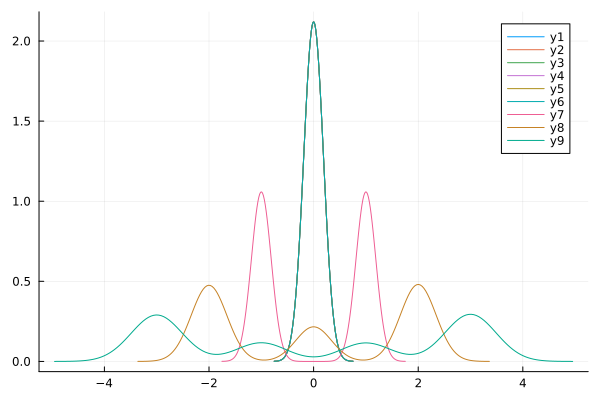

In [12]:
plot!()

In [59]:
#dimension
n=50

#Metropolis
#defining range of beta for which to run
para=2
plot()
#running for 100 trials
L= init_st(n, 0.5);
X=zeros(n,n)
MCS=n*n
#running each MC step
for m =1:10000
    b=1/para
    #choosing a random lattice point
    i=rand(1:n)
    j=rand(1:n)
    S= -2*L[i,j]*(L[boundary(i+1),j]+L[boundary(i-1),j]+L[i,boundary(j+1)]+L[i,boundary(j-1)]) #calculating energy difference between the present state and if spin is flipped
    E_diff=-S
    #using the spin flip rules
    if E_diff<=0
            L[i,j]*=-1
    else
        A=exp(-b*E_diff)
        cnt=rand()
        if cnt<A
            L[i,j]*=-1
        end
    end
    if m%MCS==0
        X=X+L
    end
    if m in [10000]
        density!(reshape(X,(n*n,1)), label="t=$m")
    end
end
  
        

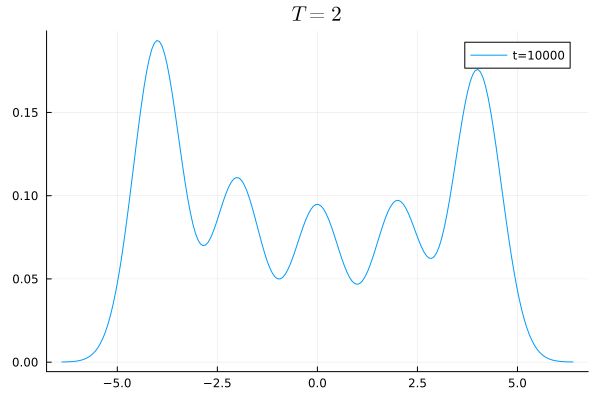

In [60]:
plot!(title=L"T=%$para")

In [84]:
#dimension
n=50

#Metropolis
#defining range of beta for which to run
para=4
plot()
#running for 100 trials
L= init_st(n, 0.5);
X=zeros(n,n)
MCS=n*n
#running each MC step
for m =1:500000
    b=1/para
    #choosing a random lattice point
    i=rand(1:n)
    j=rand(1:n)
    S= -2*L[i,j]*(L[boundary(i+1),j]+L[boundary(i-1),j]+L[i,boundary(j+1)]+L[i,boundary(j-1)]) #calculating energy difference between the present state and if spin is flipped
    E_diff=-S
    #using the spin flip rules
    if E_diff<=0
            L[i,j]*=-1
    else
        A=exp(-b*E_diff)
        cnt=rand()
        if cnt<A
            L[i,j]*=-1
        end
    end
    if m%MCS==0
        X=X+L
    end
    if m in [100000, 120000, 500000]
        density!(reshape(X,(n*n,1)), label="t=$m")
    end
end
  
        

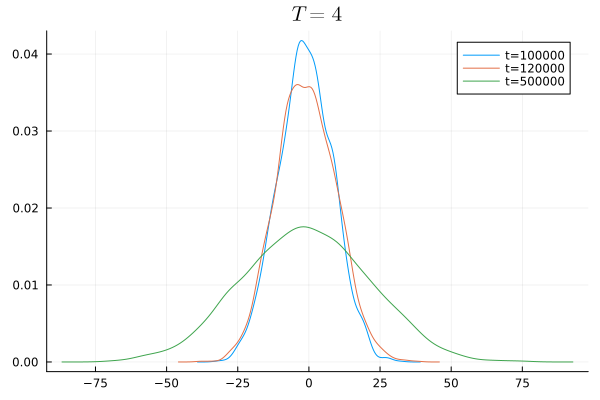

In [85]:
plot!(title=L"T=%$para")

In [82]:
#dimension
n=50

#Metropolis
#defining range of beta for which to run
para=2
plot()
#running for 100 trials
L= init_st(n, 0.5);
X=zeros(n,n)
MCS=n*n
#running each MC step
for m =1:500000
    b=1/para
    #choosing a random lattice point
    i=rand(1:n)
    j=rand(1:n)
    S= -2*L[i,j]*(L[boundary(i+1),j]+L[boundary(i-1),j]+L[i,boundary(j+1)]+L[i,boundary(j-1)]) #calculating energy difference between the present state and if spin is flipped
    E_diff=-S
    #using the spin flip rules
    if E_diff<=0
            L[i,j]*=-1
    else
        A=exp(-b*E_diff)
        cnt=rand()
        if cnt<A
            L[i,j]*=-1
        end
    end
    if m%MCS==0
        X=X+L
    end
    if m in [500000]
        density!(reshape(X,(n*n,1)), label="t=$m")
    end
end
  
        

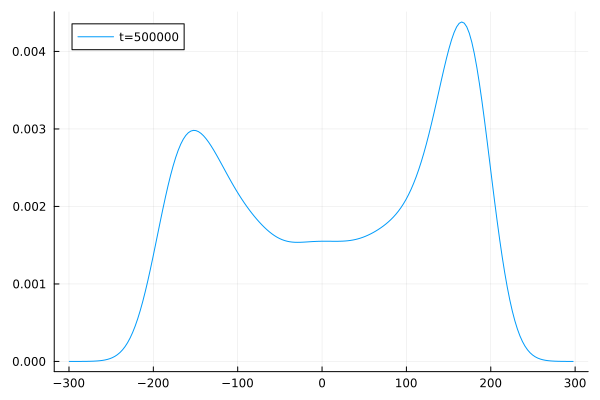

In [83]:
plot!()

In [106]:
#dimension
n=64
#Metropolis
#defining range of beta for which to run
para=6
#running for 100 trials
L= init_st(n, 0.5);
X=zeros(n,n)
MCS=n*n
#running each MC step
for m =1:800000
    b=1/para
    #choosing a random lattice point
    i=rand(1:n)
    j=rand(1:n)
    S= -2*L[i,j]*(L[boundary(i+1),j]+L[boundary(i-1),j]+L[i,boundary(j+1)]+L[i,boundary(j-1)]) #calculating energy difference between the present state and if spin is flipped
    E_diff=-S
    #using the spin flip rules
    if E_diff<=0
            L[i,j]*=-1
    else
        A=exp(-b*E_diff)
        cnt=rand()
        if cnt<A
            L[i,j]*=-1
        end
    end
    if m%MCS==0
        X=X+L
    end
    if m in [800000]
        density!(reshape(X,(n*n,1)), label="T=$para")
    end
end
  
        

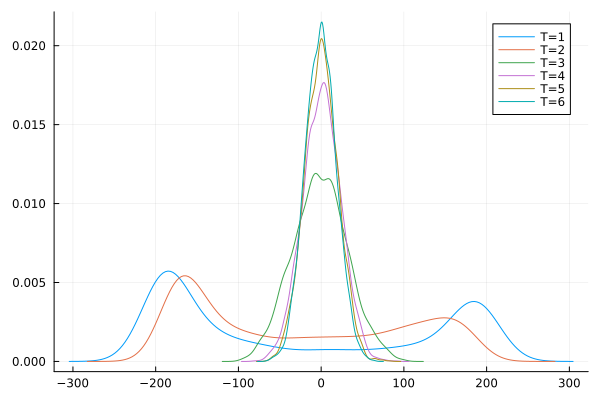

In [107]:
plot!()